In [191]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector, Operator
from qiskit import transpile


import matplotlib.pyplot as plt

import numpy as np

# Overview 

Let $n\in \mathbb{N}$ and let $U\in \mathcal{U}(2)$. We define the {\em multi-controlled $U$ gate} on a computational basis vector $\ket{x}_n\ket{y}\in \mathbb{C}^{2^n}\otimes \mathbb{C}^2$ by
$$
    (C^nU)\ket{x}_n\ket{y}
    =
    \begin{cases}
    \ket{x}_n U\ket{y} \quad \text{ if }x_i=1 \,\forall i\in [n]\\
    \ket{x}_n \ket{y} \quad \text{ else } 
    \end{cases}.
$$

Prompt: Define a function which implements $C^nU$ using only single-qubit gates and CX. 

Sources: Our sources for algorithms are 
1. Nielsen and Chuang (N-C)
2. The 1995 paper by Barenco-Bennett-Cleve-DiVicenzo-Margolus-Shor-Sleator-Smolin-Weinfurter (BBCDMSSSW) titled *Elementary gates for quantum computation*.

Methods: We have attempted a couple implementations of mcu(n,U), including:

A. **Generalized Figure 4.6 (NC)** with the CX gates replaced by MCX gates, which is described
in Lemma 7.9 (BBCDMSSSW). Main challenge: Requires a decomposition of MCX gates into single-qubit and
CNOT gates.

B. **Figure 4.10 (NC)**. Main challenge: Requires iterated CCX (Toffoli) gates whose
controls and target qubits move according to a for loop.

C. **Generalized Figure 4.8 (NC)** with the Toffoli gates replaced by MCX gates, as in Lemma 7.5 (BBCDMSSSW).

# Input
1. First we'll give the user a space to input their unitary $U = R_z(\phi)R_y(\theta)R_z(\lambda)$ by entering $\phi$, $\theta$, and $\lambda$ as parameters.
2. Next, we will set $U = list(\phi, \theta,\lambda)$ so that we can call on each of the angles as sequence elements of the list within our function's code: $U[0] = \phi$, $U[1] = \theta$, and $U[2] = \lambda.$
3. Input $n$ and $U$ into the function mcu(n,U), which will run a sub function mcx(n), defined in the next set of steps.

# Subroutine for MCX 
1. Before implementing the function for $C^nU$, we will need to implement mcx on an arbitrary number of qubits using only single-qubit gates and cx.

2. Let mcx(n) denote the circuit of a multi-controlled X gate to an $n$-qubit register with the first $n-1$ qubits controls (cbits) and the remaining qubit the target (tbit)

3. Using the transpile function, we see that mcx(n) can be implemented using h, t, p($\pi/4$), and cx(i,n-1) for i=0,1,2.


        n = 

        quantum_register = QuantumRegister(n,'x')

        mcx_circuit = QuantumCircuit(quantum_register)

        def mcx(n):

          

        return mcx_circuit


# Method A for implementing MCU

1. (4.1 & 4.2, Nielsen-Chuang) Up to a global phase, any unitary $U$ can be decomposed as $AXBXC$ where $A,B,C\in \mathcal{U}(2)$ are single-qubit gates which satisfy $ABC=I$ and can be explicitly defined in terms of the initial inputs $\phi$, $\theta$, $\lambda$:
$$
    A = R_z(\phi)R_y(\theta/2)\\
    B = R_y(-\theta/2)R_z(-(\phi + \lambda)/2)\\
    C = R_z(-(\phi-\lambda)/2).
$$

2. (4.6, Nielsen-Chuang) The single-qubit controlled $U$-gate CU decomposes as $(I\otimes A)\circ CX \circ (I\otimes B) \circ CX \circ (I\otimes B)$, where $I$ represents the identity on 1 qubit. 

3. This decomposition naturally generalizes to 
$$ 
C^nU = (I_{n-1}\otimes A)\circ C^nX \circ (I_{n-1}\otimes B)\circ C^nX \circ (I_{n-1}\otimes C),
$$ 
where $I_{n-1}$ represents the identity on (the first) $n-1$ qubits.

4. The above decomposition reduces our problem to finding a decomposition of $C^nX$ using only single-qubit gates and cx, which is what our SUBROUTINE FOR MCX function does.

5. Putting this all together, our function mcu(n,U) will look like this:

        n = 
        phi = 
        theta = 
        lambda = 
        U = list(phi,theta,lambda)


        quantum_register = QuantumRegister(n,'x')
        mcu_circuit = QuantumCircuit(quantum_register)

        def mcu(n,U):

            mcu_circuit.rz((U[0]-U[1])/2) #Applies C
            mcu_circuit.compose({\color{blue}mcx(n)},inplace = True) #Applies mcx(n)
            mcu_circuit.rz((-U[0]+U[2])/2) #Applies B
            mcu_circuit.ry(-U[1]/2) #Applies B
            mcu_circuit.compose({\color{blue}mcx(n)},inplace = True) #Applies mcx(n)
            mcu_circuit.ry(U[1]/2) #Applies A
            mcu_circuit.rz(U[0]) #Applies A

        return mcu_circuit

# $CU$ via Figure 4.6 (NC)

Towards our ultimate goal of implementing $C^nU$, we first implement $C^1U$ via a decomposition of $U$ as $e^{i\alpha} AXBXC$, where $A,B,C$ are all single qubit gates which satisfy $ABC=1$.

First, Theorem 4.1 (N-C) states that every unitary $U\in \mathcal{U}(2)$ can be decomposed as $e^{i \alpha}R_z(\phi)R_y(\theta)R_z(\lambda)$ for $\alpha,\phi,\theta,\lambda\in [0,2\pi)$. However, Qiskit's function for preparing a unitary gate $U$ given the above angles and outputing $U(\phi,\theta,\lambda)$ differs by a global phase of $e^{(\phi+\lambda)/2}$, which we may want to keep track of as we follow steps outlined in Nielsen and Chuang to implement CU. In particular, what we shall denote by $U(\phi,\theta,\lambda)$ as the output of the U3 gate is actually

$$
U(\phi,\theta,\lambda)
=
\text{quantum\_ circuit.u(theta,phi,lambda,1)}
=
{\color{red} e^{(\phi+\lambda)/2}}R_z(\phi)R_y(\theta)R_z(\lambda).
$$

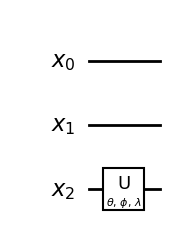

In [192]:
n = 3

quantum_register = QuantumRegister(size=n, name="x")
quantum_circuit = QuantumCircuit(quantum_register, name = 'base')


al = Parameter(r"$\alpha$")
theta = Parameter(r"$\theta$")
phi = Parameter(r"$\phi$")
lam = Parameter(r"$\lambda$")


quantum_circuit.u(theta,phi,lam, n-1)
quantum_circuit.draw(output="mpl", style="bw")


By the proof of Corollary 4.2 in Nielsen and Chuang, $U=e^{i\alpha}AXBXC$ where 
$$A=R_z(\phi)R_y(\theta/2), \quad B=R_y(-\theta/2)R_z(-(\phi + \lambda)/2),\quad \text{ and } 
\quad C=R_z(-(\phi-\lambda)/2).$$

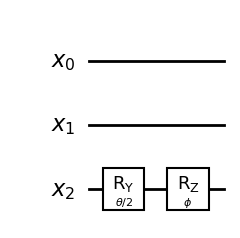

In [193]:
quantum_register = QuantumRegister(size=n, name="x")
cbits = list(range(0,n-1))
qc_A = QuantumCircuit(quantum_register, name = 'A')

qc_A.ry(theta/2,n-1)
qc_A.rz(phi,n-1)
#qc.mcp(Theta, quantum_register[:-1], quantum_register[-1])

qc_A.draw(output="mpl", style="bw")

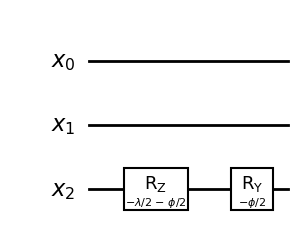

In [194]:
quantum_register = QuantumRegister(size=n, name="x")
qc_B = QuantumCircuit(quantum_register, name = 'B')

qc_B.rz(-(phi+lam)/2,n-1)
qc_B.ry(-phi/2,n-1)
#qc.mcp(Theta, quantum_register[:-1], quantum_register[-1])

qc_B.draw(output="mpl", style="bw")

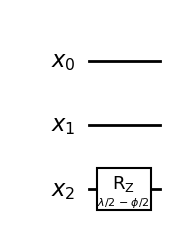

In [195]:

quantum_register = QuantumRegister(size=n, name="x")
qc_C = QuantumCircuit(quantum_register, name = 'C')

qc_C.rz(-(phi-lam)/2,n-1)
#qc.mcp(Theta, quantum_register[:-1], quantum_register[-1])

qc_C.draw(output="mpl", style="bw")

Now we'll define the controlled U using mcx (which we will later decompose according to the problem prompt).

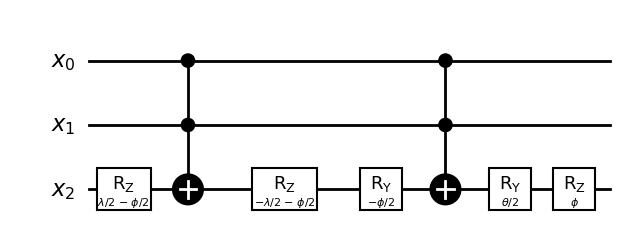

In [196]:

n = 3

quantum_register = QuantumRegister(n,'x')
cbits = list(range(0,n-1))

Controlled_U_Circuit = QuantumCircuit(quantum_register)

#Controlled_U_Circuit.mcp(al,cbits,n-1)
Controlled_U_Circuit.rz(-(phi-lam)/2,n-1)
Controlled_U_Circuit.mcx(cbits,n-1)
Controlled_U_Circuit.rz(-(phi+lam)/2,n-1)
Controlled_U_Circuit.ry(-phi/2,n-1)
Controlled_U_Circuit.mcx(cbits,n-1)
Controlled_U_Circuit.ry(theta/2,n-1)
Controlled_U_Circuit.rz(phi,n-1)

Controlled_U_Circuit.draw(output="mpl", style="bw")


# Decomposing ccx

So now what's left to do is to decompose the Toffoli gate ccx, or more generally, the mcx gate on $n$ qubits depending on the method we employ for implementing $C^nU$.

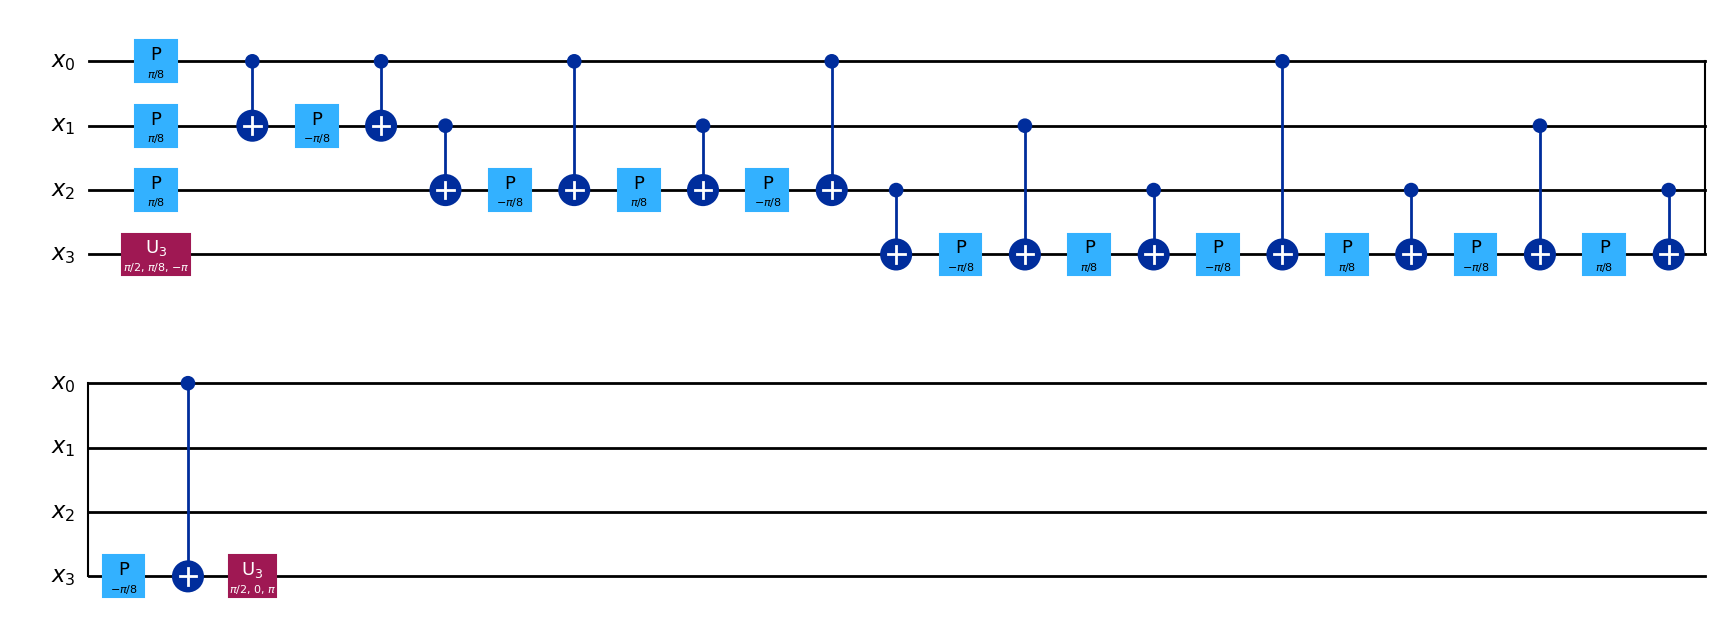

In [197]:
#Here is a decomposition of the multi-controlled x gate into 
# single-qubit states and CNOT gates

n = 4
cbits = list(range(0,n-1))

qr = QuantumRegister(n,'x')
qc = QuantumCircuit(qr)

qc.mcx(cbits,n-1)
decomposed_mcx = transpile(qc, basis_gates=['ry','p','t','s','u3','cx'])
decomposed_mcx.draw(output="mpl")

Initially I thought there was a discernable pattern (looking only at n=2, 3, 4), but even at the level of n=5, the pattern I thougth I recognized is gone, so coding it according to the pattern is not reliable. Instead, we might want to just employ the "inefficient" decomposition of $C^nU$ given in Figure 4.10 of Nielsen and Chuang. It requires only ccx, so decomposing mcx for arbitrary n is not needed here.

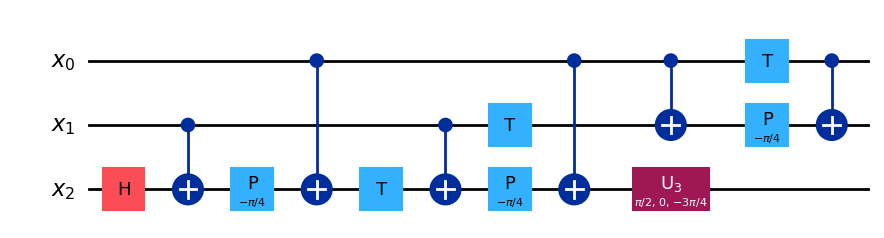

In [198]:
#Decomposition of ccx

qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

qc.ccx(0,1,2)
decomposed_ccx = transpile(qc, basis_gates=['ry','p','t','s','h','u3','cx'])
decomposed_ccx.draw(output="mpl")

# Method B: Nielsen-Chuang Figure 4.10

To implement mcu(n,U), Figure 4.10 (NC) requires $n+2$ Toffoli gates and a CU gate. Although this is currently our best working implementation, it is not very efficient given the number of Toffoli gates required, each of which has a time complexity of 10.

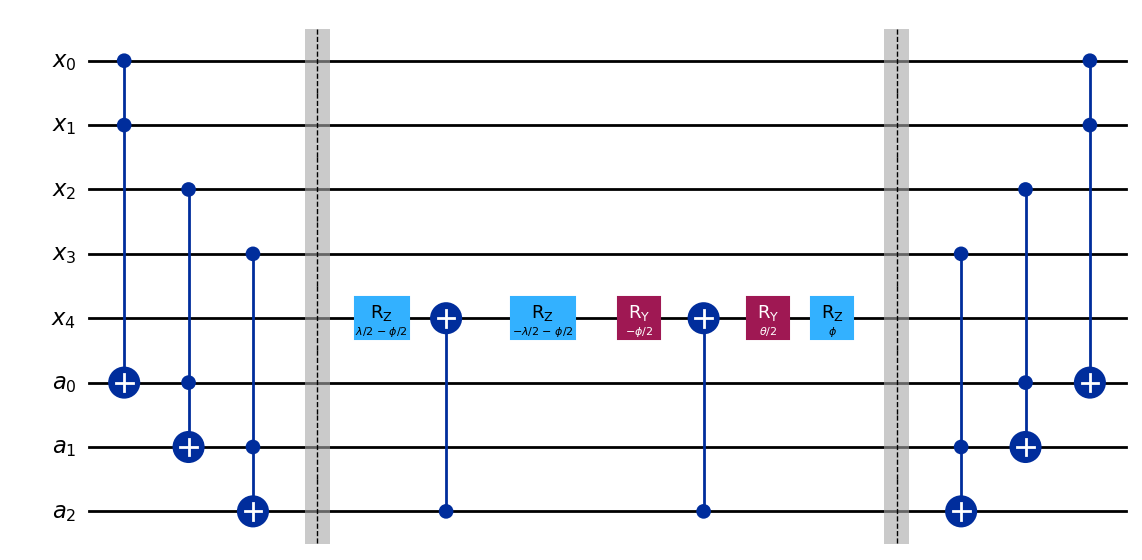

In [209]:
n = 5 #Make sure this n matches the n in the previous code box for 
#the decomposition of the Toffoli (ccx) gate.

al = Parameter(r"$\alpha$")
theta = Parameter(r"$\theta$")
phi = Parameter(r"$\phi$")
lam = Parameter(r"$\lambda$")


qr = QuantumRegister(n,'x')
ar = AncillaRegister(n-2,'a')

mcu_qc = QuantumCircuit(qr,ar,name = 'Multi-controlled X')

#The first Toffoli gate in Figure 4.10 always has the 0,1 qubits as controls
#and the first ancilla bit (-(n-2)) as the target.

    ##Pick one of the following two to uncomment:
#mcu_qc.compose(ccx(0,1,-(n-2)),inplace = True) #Uncomment to decompose ccx
mcu_qc.ccx(0,1,-(n-2)) #Uncomment to compress ccx
    ##

#Now we'll apply the iterated Toffoli gates before the controlled U gate.

for i in range(2,n-1):
        ##Pick one of the following two to uncomment:
    #mcu_qc.compose(ccx(i,i+(n-2),i+(n-1)),inplace = True) #Uncomment to decompose ccx
    mcu_qc.ccx(i,i+(n-2),i+n-1) #Uncomment to compress ccx
        ##

mcu_qc.barrier()

#Here we have U decomposed using Figure 4.6 (code written earlier).

#Begin controlled U gate #
mcu_qc.rz(-(phi-lam)/2,n-1)
mcu_qc.cx(-1,n-1)
mcu_qc.rz(-(phi+lam)/2,n-1)
mcu_qc.ry(-phi/2,n-1)
mcu_qc.cx(-1,n-1)
mcu_qc.ry(theta/2,n-1)
mcu_qc.rz(phi,n-1)
# End controlled U gate#

mcu_qc.barrier()

#Now we'll apply the rest of the iterated Toffoli gates following the controlled U gate.

for i in reversed(range(2,n-1)):
        ##Pick one of the following two to uncomment:
    #mcu_qc.compose(ccx(i,i+(n-2),i+(n-1)),inplace = True) #Uncommenting decomposes ccx
    mcu_qc.ccx(i,i+(n-2),i+n-1) #Uncommenting compresses ccx
        ##

#The last Toffoli gate in Figure 4.10 always has the 0,1 qubits as controls
#and the first ancilla bit (-(n-2)) as the target.

    ##Pick one of the following two to uncomment:
#mcu_qc.compose(ccx(0,1,-(n-2)),inplace = True) #Uncommenting this decomposes ccx
mcu_qc.ccx(0,1,-(n-2)) #Uncommenting this compresses ccx
    ##

mcu_qc.draw(output="mpl")

# CCX (Toffoli) decomposition

Here we give a decomposition of CCX inside a register of size $2n-2$ (to allow for an $n-2$-bit ancilla register) where the control bits, c1 and c2, and the target bit, tbit, can be chosen.

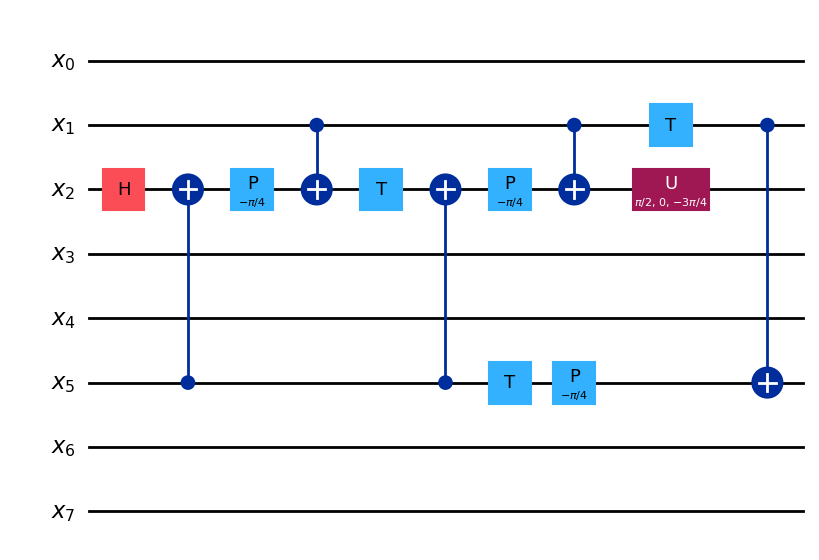

In [206]:
## Here is a decomposition of the Toffoli gate 
# on a 2n-2 qubit register (size needed for next step)

n = 5 #number of bits in quantum register (not including ancilla)
#2n-2 is how many total bits will be in combined register for 
#implementing mcu

c1 = 1 #one of the two control bits
c2 = 5 #one of the two control bits
tbit = 2 #target bit


qr = QuantumRegister(2*n-2,'x')
qc_ccx = QuantumCircuit(qr)

#This is just copied from transpile of ccx above

def ccx(c1,c2,tbit):
    qc_ccx.h(tbit)
    qc_ccx.cx(c2,tbit)
    qc_ccx.p(-np.pi/4,tbit)
    qc_ccx.cx(c1,tbit)
    qc_ccx.t(tbit)
    qc_ccx.cx(c2,tbit)
    qc_ccx.t(c2)
    qc_ccx.p(-np.pi/4,tbit)
    qc_ccx.cx(c1,tbit)
    qc_ccx.u(np.pi/2,0,-3*np.pi/4,tbit)
    qc_ccx.t(c1)
    qc_ccx.p(-np.pi/4,c2)
    qc_ccx.cx(c1,c2)
    return qc_ccx

#qc_ccx.compose(ccx(c1,c2,tbit),inplace = True)
ccx(c1,c2,tbit)
qc_ccx.draw(output="mpl")



Note that this decomposition of the Toffoli gate has a time complexity of 10, while a common decomposition of the same gate using only the H, T, Tdag, S, and CX gates as in Figure 4.9 (NC) has a time complexity of 13. 

We will now use our decomposition of ccx above to implement Method B.

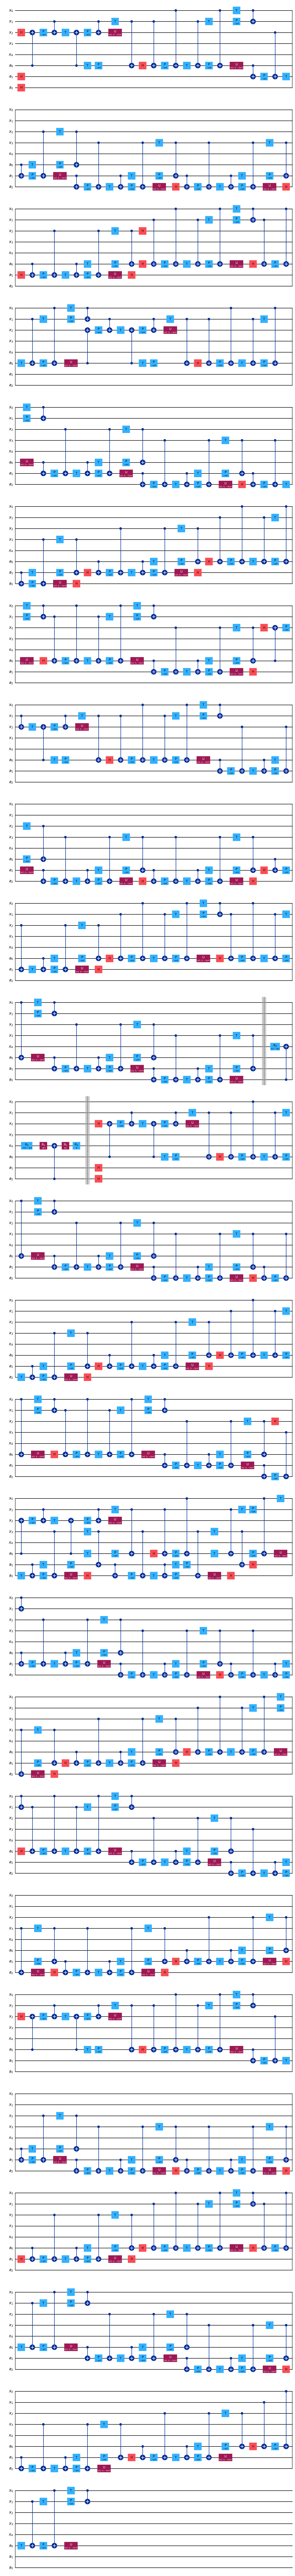

In [208]:
n = 5 #Make sure this n matches the n in the previous code box for 
#the decomposition of the Toffoli (ccx) gate.

al = Parameter(r"$\alpha$")
theta = Parameter(r"$\theta$")
phi = Parameter(r"$\phi$")
lam = Parameter(r"$\lambda$")


qr = QuantumRegister(n,'x')
ar = AncillaRegister(n-2,'a')

mcu_qc = QuantumCircuit(qr,ar,name = 'Multi-controlled X')

#The first Toffoli gate in Figure 4.10 always has the 0,1 qubits as controls
#and the first ancilla bit (-(n-2)) as the target.

    ##Pick one of the following two to uncomment:
mcu_qc.compose(ccx(0,1,-(n-2)),inplace = True) #Uncomment to decompose ccx
#mcu_qc.ccx(0,1,-(n-2)) #Uncomment to compress ccx
    ##

#Now we'll apply the iterated Toffoli gates before the controlled U gate.

for i in range(2,n-1):
        ##Pick one of the following two to uncomment:
    mcu_qc.compose(ccx(i,i+(n-2),i+(n-1)),inplace = True) #Uncomment to decompose ccx
    #mcu_qc.ccx(i,i+(n-2),i+n-1) #Uncomment to compress ccx
        ##

mcu_qc.barrier()

#Here we have U decomposed using Figure 4.6 (code written earlier).

#Begin controlled U gate #
mcu_qc.rz(-(phi-lam)/2,n-1)
mcu_qc.cx(-1,n-1)
mcu_qc.rz(-(phi+lam)/2,n-1)
mcu_qc.ry(-phi/2,n-1)
mcu_qc.cx(-1,n-1)
mcu_qc.ry(theta/2,n-1)
mcu_qc.rz(phi,n-1)
# End controlled U gate#

mcu_qc.barrier()

#Now we'll apply the rest of the iterated Toffoli gates following the controlled U gate.

for i in reversed(range(2,n-1)):
        ##Pick one of the following two to uncomment:
    mcu_qc.compose(ccx(i,i+(n-2),i+(n-1)),inplace = True) #Uncommenting decomposes ccx
    #mcu_qc.ccx(i,i+(n-2),i+n-1) #Uncommenting compresses ccx
        ##

#The last Toffoli gate in Figure 4.10 always has the 0,1 qubits as controls
#and the first ancilla bit (-(n-2)) as the target.

    ##Pick one of the following two to uncomment:
mcu_qc.compose(ccx(0,1,-(n-2)),inplace = True) #Uncommenting this decomposes ccx
#mcu_qc.ccx(0,1,-(n-2)) #Uncommenting this compresses ccx
    ##

mcu_qc.draw(output="mpl")

# Complexity

Our implementation of mcx on an $n$-qubit register has a fixed time complexity of 11 involving cx, t, h, and p($\pi/4$), regardless of $n$. Our implementation of $A$, $B$, and $C$ in the decomposition for $U$ requires 5 gates involving rz and ry, only. The total time complexity, then for implementing our $mcu(n,U)$ is 27, given that we apply the mcx gate twice in a single iteration of our mcu circuit.









Below here is stuff we probably won't use.

In [64]:
#Let's try to define a function which will implement this.

n = 3
quantum_register = QuantumRegister(n,'x')
quantum_circuit = QuantumCircuit(quantum_register, name='decompose mcx')

def mcx(n):
    quantum_circuit.p(np.pi/8,cbits)
    quantum_circuit.u(np.pi/2,np.pi/8,-np.pi,n-1)
    for j in range(1,n):
        for i in range(2**j):
            quantum_circuit.cx(i,j)
            quantum_circuit.p(-np.pi/8,j)
            #if i % 2**(j-1)==1:
             #   quantum_circuit.cx(j-i-1,j)     
            #else:
            #    i=i+1 #next i!
             #   quantum_circuit.p(np.pi/8,j)
            quantum_circuit.barrier()
    quantum_circuit.h(n-1) 
    return quantum_circuit   
               


quantum_circuit.compose(mcx(n),inplace = True)
quantum_circuit.draw(output="mpl")


CircuitError: 'duplicate qubit arguments'

In [ ]:
n = 3
cbits = list(range(0,n-1))

quantum_register = QuantumRegister(n,'x')
quantum_circuit  = QuantumCircuit(quantum_register, name = 'base')

quantum_circuit.cp(al,cbits,n-1)
quantum_circuit.compose(app_C, inplace=True)
quantum_circuit.mcx(cbits,n-1)
quantum_circuit.compose(app_B, inplace=True)
quantum_circuit.mcx(cbits,n-1)
quantum_circuit.compose(app_A, inplace=True)

quantum_circuit.draw(output="mpl")



NameError: name 'app_C' is not defined

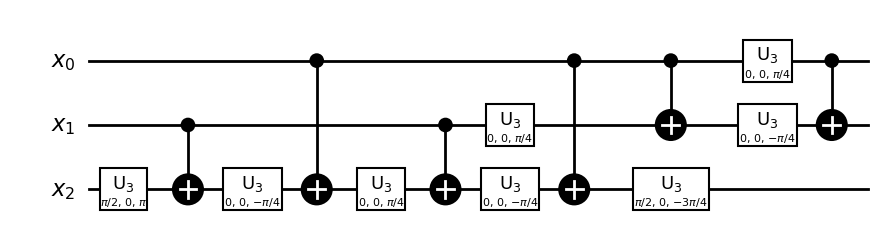

In [ ]:
decomposed_qc = transpile(qc, basis_gates=['u3', 'cx'])

decomposed_qc.draw(output="mpl", style="bw")